## Unsupervised Learning

Unsupervised learning is the most applicable subfield on machine learning as it does not require any labels in the dataset and world is __itself__ is an abundance of dataset. Human beings and their actions are recorded more and more every day(through photographs in Instagram, health data through wearables, internet activity through cookies and so on). Even the part of our lives which are not digital will be recorded in near future thanks to internet of things. In such a diversified and unlabeled dataset, unsupervised learning will become more and more important in the future.

Not only it could be useful for dimensionality reduction in the feature set(like a preprocessing step) but also could be useful as feature extraction method. PCA(Principal Component Analysis) could be one of the most used unsupervised learning algorithm(PCA to unsupervised learning, linear regression equivalent to regression). It could be used both a dimensionality reduction in order to reduce data but also while it compresses(reduces) data, since it tries to capture the variance, it could pick up _interesting_ featurse, so could be used as a feature extraction method. 

In this notebook, I will use PCA to both reduce dimensionality in the dataset and also build our feature vector. This specific method is called EigenFace(due to PCA extracting the eigenvectors and they could be visualized as face). 

## Dimensionality Reduction & Feature Extraction via PCA (EigenFace)

In [1]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import scipy


from sklearn import cluster
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition # PCA

import time

#### Modified Olivetti faces dataset

In [ ]:
faces = datasets.olivetti_faces.fetch_olivetti_faces()

In [ ]:
print(faces.DESCR)

In [ ]:
faces_images = faces['images']
faces_data = faces.data

In [ ]:
faces_images.shape

Images are nothing but reshaped `faces_data`. It makes it easier for us to visualize the faces in an image grid but, we will
use the faces_data to apply PCA. This is because PCA expects two dimensions `(n_observations, n_dimensions)`.

In [ ]:
faces_data.shape

We have 400 instances and their vector dimension is 4096(256 * 256). We could reduce this dimension by applying PCA(Principal Component Analysis) and also PCA would extract features as well. 

Let's see some faces.

In [ ]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1) # It starts with one
    plt.imshow(faces_images[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

Let's try first number of eigenfaces 16 and then see what type of eigenfaces we get. Note that I am also passing the `whiten=True` in the PCA in order to remove the low-frequency(constant) areas in the face as those areas are not as important as areas that have variation and change(PCA also makes an assumption on the data very similarly).

In [ ]:
n_eigenfaces = 16
# Creating PCA object
pca = decomposition.RandomizedPCA(n_components=n_eigenfaces, whiten=True)
# We are applying PCA to the data
pca.fit(faces_data)

In [ ]:
pca.components_.shape

In [ ]:
plt.figure(figsize=(16, 16));
plt.suptitle('EigenFaces');
for ii in range(pca.components_.shape[0]):
    plt.subplot(4, 4, ii + 1) # It starts with one
    plt.imshow(pca.components_[ii].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16, 12));
    plt.title('Explained Variance Ratio over Component');
    plt.plot(pca.explained_variance_ratio_);

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16, 12));
    plt.title('Cumulative Explained Variance over EigenFace');
    plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
print('PCA captures {:.2f} percent of the variance in the dataset'.format(pca.explained_variance_ratio_.sum() * 100))

This is kind of low, we generally want 95% to be able to say, we could represent the dataset quite accurately with small number
of dimensions. Let's increase the number of dimensions.

In [ ]:
n_eigenfaces = 121
# Creating PCA object
pca = decomposition.RandomizedPCA(n_components=n_eigenfaces, whiten=True)
# We are applying PCA to the data
pca.fit(faces_data)

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16, 12));
    plt.title('Cumulative Explained Variance over EigenFace ');
    plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
print('PCA captures {:.2f} percent of the variance in the dataset'.format(pca.explained_variance_ratio_.sum() * 100))

This is good enough. Let's look what kind of eigenfaces we have this time.

In [ ]:
plt.figure(figsize=(16, 16));
plt.suptitle('EigenFaces');
for ii in range(pca.components_.shape[0]):
    plt.subplot(11, 11, ii + 1) # It starts with one
    plt.imshow(pca.components_[ii].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

### Pointers
<shameless-self-promotion>
- [PCA and Its applications | Application on Yale Face Database](http://bugra.github.io/work/notes/2013-07-27/PCA-EigenFace-And-All-That/)
- [EigenFace Library for Yale Face Database](https://github.com/bugra/EigenFace)
- [Geometric Explanation of EigenFace](http://bugra.github.io/work/notes/2014-09-27/geometric-take-on-pca/)
</shameless-self-promotion>
- [Original EigenFace Paper](http://www.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### Clustering Algorithms Comparison on Toy Datasets

Let's generate some datasets. Put random `seed=0` for reproducibility. The datasets are synthetic and I added a little noise on top of every dataset in order not to have very clean signals.

It is always good practice to test your machine learning pipeline on the synthetic datasets similar to original dataset that you have due to two reasons; first you could measure the effectiveness relatively easy dataset and if the results are not promising you would not waste your time to prepare the original dataset, second it is easy to compare different clustering algorithms on well-known dataset whereas it might be harder to compare in an original dataset(e.g. if we do not know how many clusters that we have in dataset).

Especially, if you do not have knowledge on how all the clustering methods work and want to simply experiment, the datasets that Scikit-learn provides becomes quite handy.

In [2]:
np.random.seed(0)

n_samples = 2500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
circles = datasets.make_circles(n_samples=n_samples, noise=.05)
s_curve = datasets.make_s_curve(n_samples=n_samples, noise=.05)
swiss_roll = datasets.make_swiss_roll(n_samples=n_samples, noise=.05)

s_curve = np.vstack((s_curve[0][:, 0], s_curve[0][:, 2])).T, None
swiss_roll = np.vstack((swiss_roll[0][:,0], swiss_roll[0][:,2])).T, None

data_samples = [
                noisy_circles, 
                noisy_moons, 
                blobs, 
                circles, 
                s_curve, 
                swiss_roll
               ]

Put six different clustering algorithms to compare their performances on the dataset.

/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 2499 + 1) instead
  0, n_samples - 1, init_size)
/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 2499 + 1) instead
  0, n_samples - 1, init_size)
/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This funct

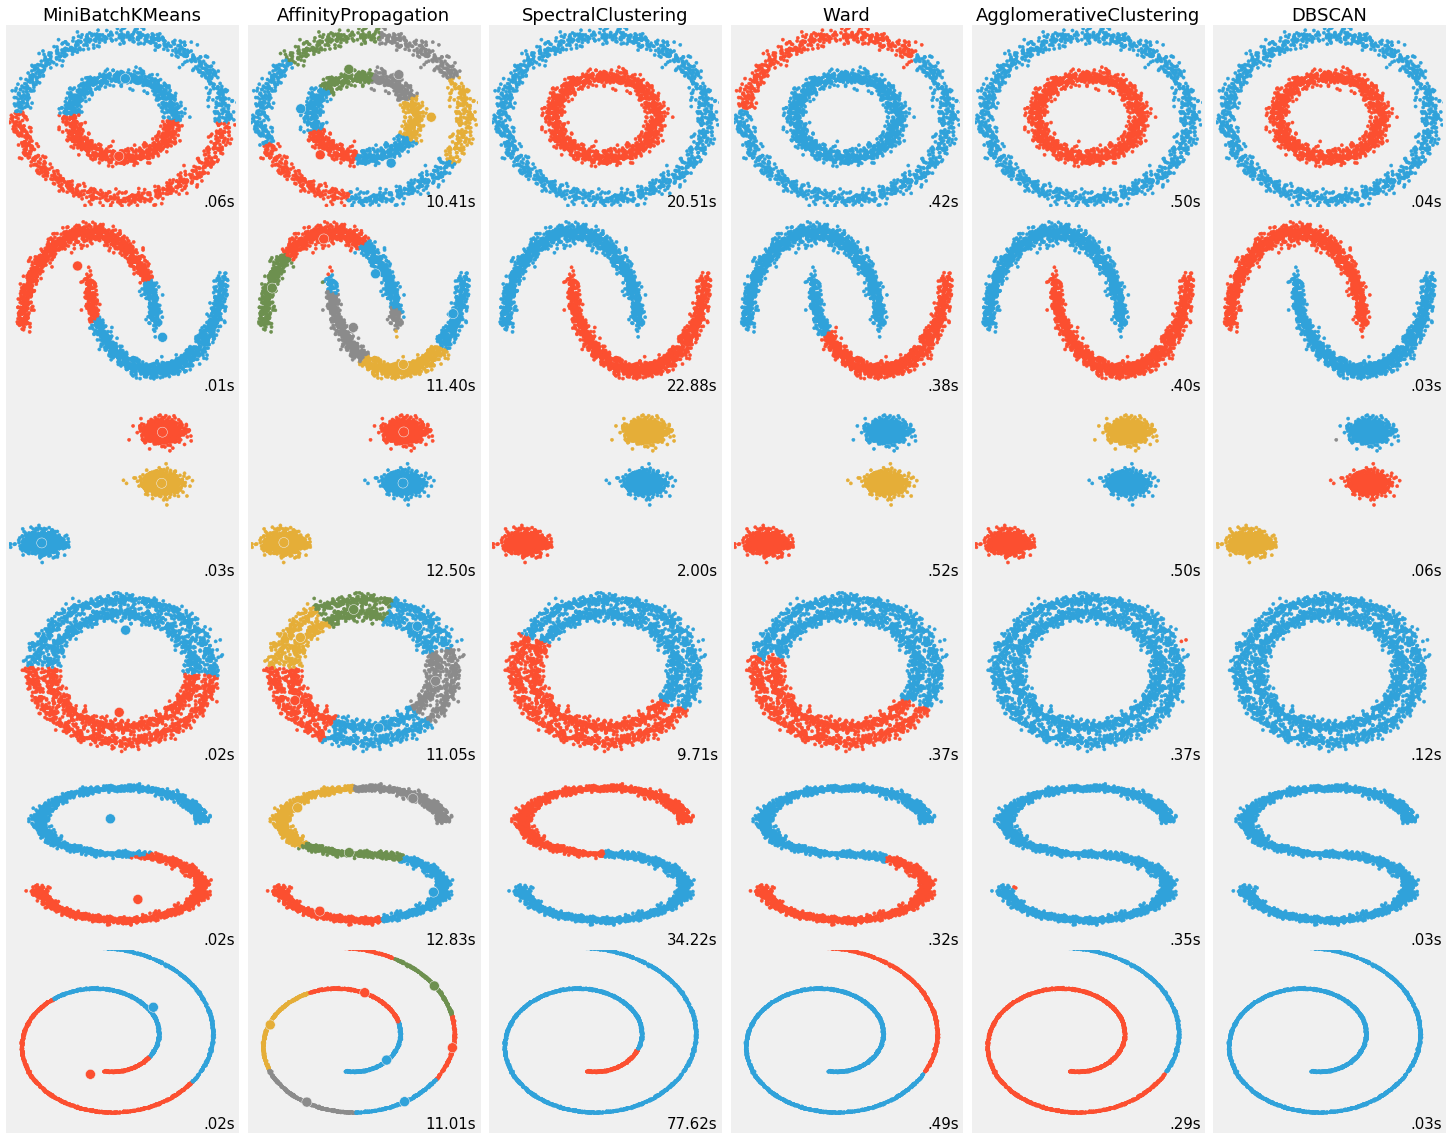

In [3]:
colors = np.array([ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')])
colors = np.hstack([colors] * 200)
plt.figure(figsize=(20, 16))
with plt.style.context('fivethirtyeight'):
    plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    for ii, dataset in enumerate(data_samples):
        X, y = dataset
        
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # Compute distances
        distances = metrics.euclidean_distances(X)
        if ii == 2:
            n_clusters = 3
        else:
            n_clusters = 2
            
        # create clustering estimators
        
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
        
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters,
                        linkage='ward', connectivity=connectivity)
        
        spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                              eigen_solver='arpack',
                                              affinity="nearest_neighbors")
        
        dbscan = cluster.DBSCAN(eps=.2)
        
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                           preference=-200)

        average_linkage = cluster.AgglomerativeClustering(linkage="average",
                                affinity="cityblock", n_clusters=n_clusters,
                                connectivity=connectivity)

        

        clustering_algos = [
                    ('MiniBatchKMeans', two_means),
                    ('AffinityPropagation', affinity_propagation),
        #           ('MeanShift', ms),
                    ('SpectralClustering', spectral),
                    ('Ward', ward),
                    ('AgglomerativeClustering', average_linkage),
                    ('DBSCAN', dbscan)
                   ]

        for name, algorithm in clustering_algos:
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(clustering_algos), len(data_samples), plot_num)
            if ii == 0:
                plt.title(name, size=18)
            plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

            if hasattr(algorithm, 'cluster_centers_'):
                centers = algorithm.cluster_centers_
                center_colors = colors[:len(centers)]
                plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1